***Question 1***
---

***ChatGPT Chat Summary***

### Chat Summary:

1. **Classification Decision Tree Basics**:
   - A tool for classifying things into categories by asking questions about their features.
   - Example: Classifying animals as "cat" or "dog" based on features like "Does it bark?"

2. **Problems and Applications**:
   - Addresses **classification problems** (e.g., spam detection, medical diagnosis, fraud detection).
   - Useful in real-world scenarios like customer segmentation, credit scoring, and marketing.

3. **Comparison with Multiple Linear Regression**:
   - **Classification Decision Trees** predict **categories** using logical rules and splits.
   - **Multiple Linear Regression** predicts **numerical values** using a mathematical formula.

4. **Main Differences**:
   - Decision trees follow a step-by-step, logical approach to reach a category.
   - Linear regression uses a continuous equation to calculate a numeric outcome.

This summary highlights the key concepts and contrasts between the two models. Let me know if you'd like anything else clarified!

link: https://chatgpt.com/share/6737ea0b-d440-800d-9639-9f70291d8faa

***Question 2***
----

1. A real world example where the accuracy metric is particularly useful are spam email detection. The accuracy metirc is important in spam email detection, as it is impotant to minimize false positives (sending important emails to spam folder) as well as false negatives (sending scam emails to the main inbox).

2. A real world example where the sensitivity metrix is particularily useful is medical diagonosis. In medical diagnosis, it is very important we maximize true positives over true negatives because there is no harm in false positives, but someone could loose their life over a false negative. Sensitivity is important when the cost of false negatives are high. 

3. A real world example where the specificity metrix is particularily useful is legal sentencing. In legal sentencing, it is very important we maximize true negatives over true positives because the judicial system prefers that 10 guilty people get away then 1 innocent person get sentenced. Sensitivity is important when the cost of false positives are high. 

4. A real world example where the precision metrix is particularily useful is fraud detection in banking. lagging legitimate transactions as fraudulent (false positives) can inconvenience customers and harm trust. High precision ensures that only actual fraudulent transactions are flagged, minimizing unnecessary customer frustration. Sensitivity is important when the cost of false positives are high. 


### Chat Summary:

We discussed different evaluation metrics and their real-world application scenarios:  

1. **Accuracy**:  
   - **Use case**: Spam email detection, quality control, weather classification.  
   - **Why?** Works well when false positives and false negatives have similar costs and the dataset is balanced.

2. **Sensitivity (Recall)**:  
   - **Use case**: Medical diagnosis (e.g., cancer detection), fraud detection, search and rescue operations, disease screening.  
   - **Why?** Prioritizes catching all true positives, especially when missing one (false negative) has severe consequences.

3. **Specificity**:  
   - **Use case**: Spam filtering (avoiding legitimate emails marked as spam), legal systems (avoiding false accusations), product defect detection, job screening.  
   - **Why?** Important when avoiding false positives (incorrectly labeling negatives as positives) is crucial.

4. **Precision**:  
   - **Use case**: Fraud detection (minimizing legitimate transactions flagged as fraud), medical diagnosis for rare diseases, spam filtering (correctly identifying spam), hiring decisions, recommendation systems.  
   - **Why?** Focuses on ensuring that positive predictions are actually correct, minimizing false positives.

Would you like further details on how these metrics are calculated or applied together?

link: https://chatgpt.com/share/6737ea0b-d440-800d-9639-9f70291d8faa

***Question 3***
---

In [13]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop the specified columns: Weight_oz, Width, Height
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop all remaining rows with any NaN entries
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Set 'Pub year' and 'NumPages' to int, and 'Hard_or_Paper' to category
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')



***ChatGPT Chat Summary***

Here’s a summary of the changes made to the code:

1. **Dropped specified columns**: Removed the `Weight_oz`, `Width`, and `Height` columns.
2. **Removed rows with missing values**: Used `dropna()` to eliminate rows with any `NaN` entries.
3. **Changed data types**:
   - Converted `Pub year` and `NumPages` columns to `int`.
   - Converted `Hard_or_Paper` column to the `category` type.

The code now cleans the dataset by removing unnecessary columns, handling missing data, and ensuring the specified columns have the correct data types.

Let me know if you need further adjustments!

link: https://chatgpt.com/share/6737f0c0-3604-800d-940d-9391a393c98f

***Question 4***
---

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import graphviz as gv

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop the specified columns: Weight_oz, Width, Height
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop all remaining rows with any NaN entries
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Set 'Pub year' and 'NumPages' to int, and 'Hard_or_Paper' to category
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Split the data into 80% training and 20% testing
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report the number of observations in each set
print(f"Training data observations: {ab_reduced_noNaN_train.shape[0]}")
print(f"Testing data observations: {ab_reduced_noNaN_test.shape[0]}")


Training data observations: 255
Testing data observations: 64


In [15]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=42)

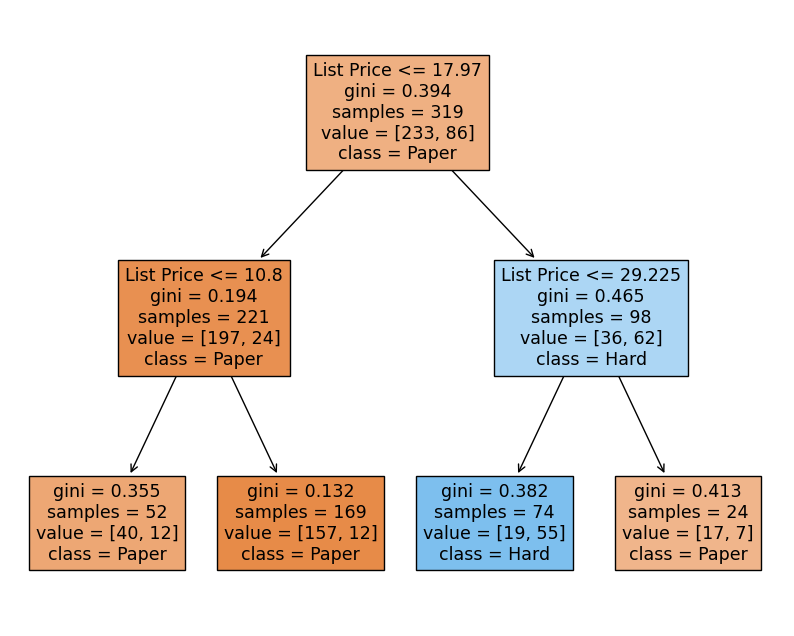

In [17]:
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.show()

The classification tree predicts that if the list price of a tree is greater than 29.225 it is a hardcover. The book is a paperback otherwise. 

***Question 5***
---


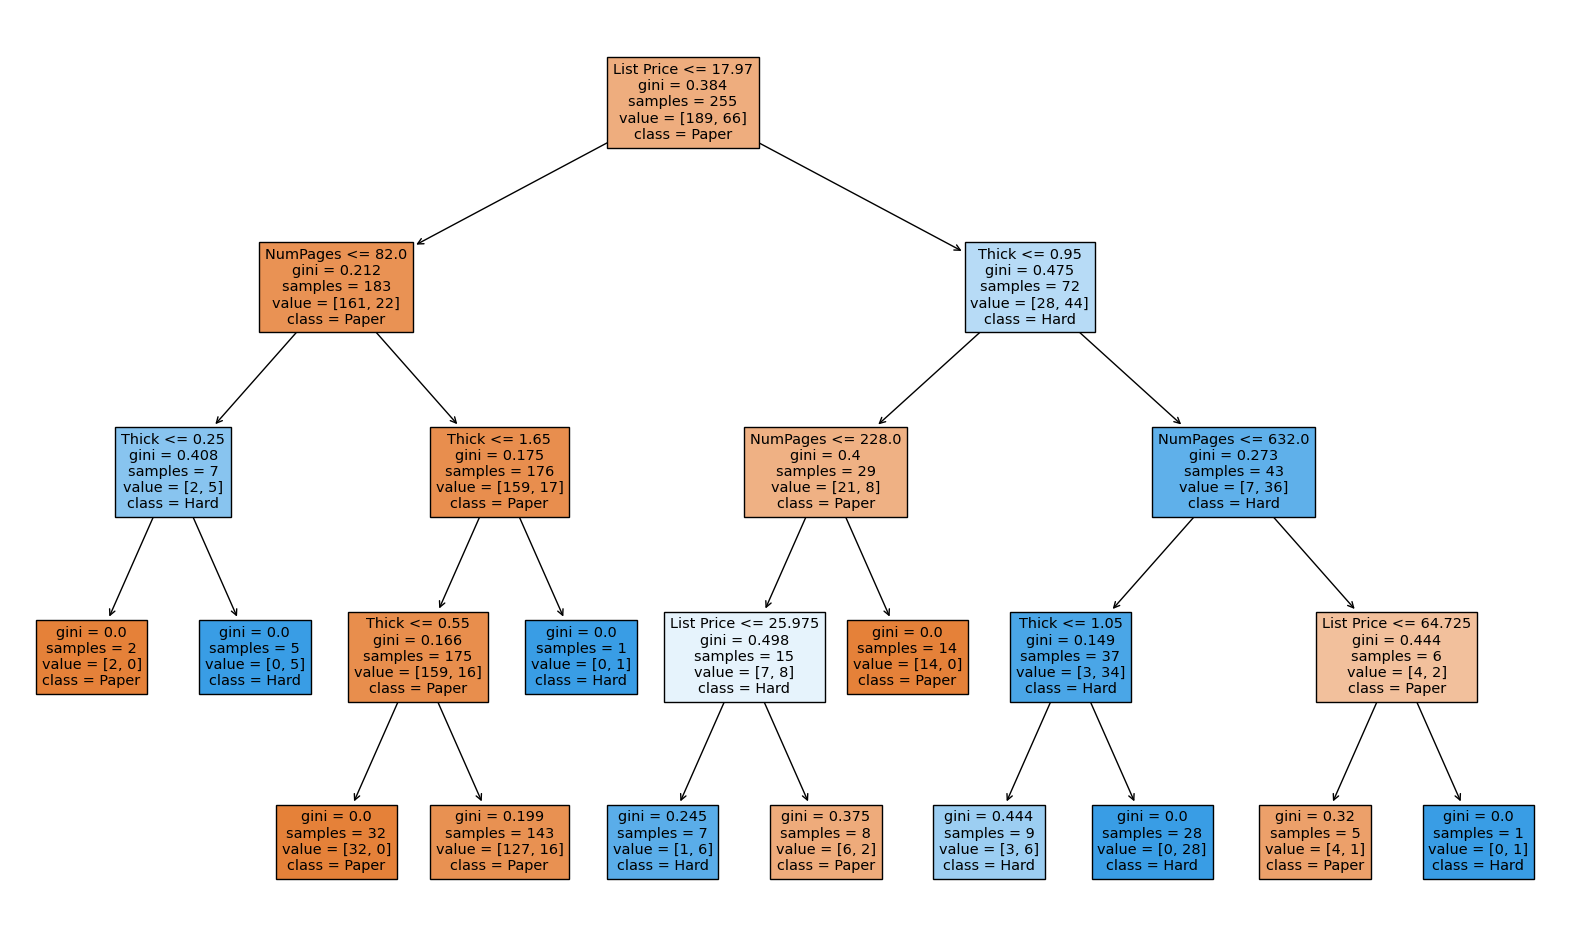

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt

# Predictor variables
X_train = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Target variable (adjust based on actual categories)
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Train the decision tree classifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the tree with matplotlib
plt.figure(figsize=(20, 12))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paper', 'Hard'], filled=True)
plt.show()



In the Clf2 model predictions on a book's cover material depende on a multitude of factors including the number of pages, thickness of book, and Listprice of the book. 

***ChatGPT Chat History***
Here’s the summary of the last part:

- You were working on training a `DecisionTreeClassifier` using predictor variables such as `NumPages`, `Thick`, and `List Price` to predict whether a book is a hardcover or paperback.
- There was a `KeyError` due to the target column having values `'P'` for paperback and `'H'` for hardcover, not `'Hard'` and `'Paper'`.
- The issue was fixed by adjusting the code to use `'H'` for hardcover when creating the target variable using `pd.get_dummies`.

Let me know if you'd like more details!

link: https://chatgpt.com/share/6737f0c0-3604-800d-940d-9391a393c98f

***Question 6***
---

In [31]:
# Verify that the training data and test data have the same feature columns
print("Training data columns:", X_train.columns)
print("Test data columns:", X_test.columns)

# Train clf2 using the correct features
X_train_clf2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Train clf2 model
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train_clf2, y_train)

# Now make predictions using clf2
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion matrix and performance metrics for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = cm_clf2.ravel()

sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2)
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

print("\nFor clf2 (Decision Tree 2):")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")
print(f"Accuracy: {accuracy_clf2:.4f}")



Training data columns: Index(['NumPages', 'Thick', 'List Price'], dtype='object')
Test data columns: Index(['NumPages', 'Thick', 'List Price'], dtype='object')

For clf2 (Decision Tree 2):
Sensitivity: 0.7500
Specificity: 0.9091
Accuracy: 0.8594


In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Make sure X_test has the same columns as X_train (e.g., NumPages, Thick, List Price)
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Ensure same features as in training

# Predict on the test set using both models
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# Confusion Matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paper', 'Hard'])
disp_clf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for clf (max_depth=2)")
plt.show()

# Confusion Matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paper', 'Hard'])
disp_clf2.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for clf2 (max_depth=4)")
plt.show()

# Calculate Sensitivity, Specificity, and Accuracy for clf
TP_clf = cm_clf[1, 1]  # True positives
TN_clf = cm_clf[0, 0]  # True negatives
FP_clf = cm_clf[0, 1]  # False positives
FN_clf = cm_clf[1, 0]  # False negatives

sensitivity_clf = TP_clf / (TP_clf + FN_clf)  # True positive rate
specificity_clf = TN_clf / (TN_clf + FP_clf)  # True negative rate
accuracy_clf = accuracy_score(y_test, y_pred_clf)  # Overall accuracy

# Calculate Sensitivity, Specificity, and Accuracy for clf2
TP_clf2 = cm_clf2[1, 1]  # True positives
TN_clf2 = cm_clf2[0, 0]  # True negatives
FP_clf2 = cm_clf2[0, 1]  # False positives
FN_clf2 = cm_clf2[1, 0]  # False negatives

sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)  # True positive rate
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)  # True negative rate
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)  # Overall accuracy

# Reporting the results
print(f"Results for clf (max_depth=2):")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")
print(f"Accuracy: {accuracy_clf:.4f}")

print("\n")

print(f"Results for clf2 (max_depth=4):")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")
print(f"Accuracy: {accuracy_clf2:.4f}")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- NumPages
- Thick


Training data columns: Index(['NumPages', 'Thick', 'List Price'], dtype='object')
Test data columns: Index(['NumPages', 'Thick', 'List Price'], dtype='object')

For clf (Decision Tree 1):
Sensitivity: 0.7000
Specificity: 0.9091
Accuracy: 0.8438

For clf2 (Decision Tree 2):
Sensitivity: 0.7500
Specificity: 0.9091
Accuracy: 0.8594


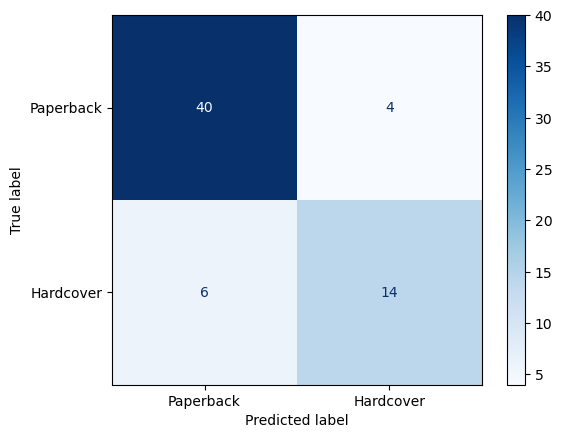

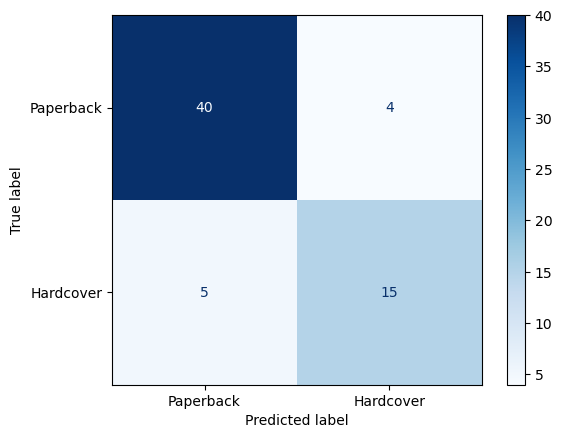

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz as gv

# Ensure target variable 'Hard_or_Paper' is correctly encoded as binary (0 for Paper, 1 for Hard)
y_train = ab_reduced_noNaN_train['Hard_or_Paper'].map({'P': 0, 'H': 1})
y_test = ab_reduced_noNaN_test['Hard_or_Paper'].map({'P': 0, 'H': 1})

# Verify that the training data and test data have the same feature columns
print("Training data columns:", X_train.columns)
print("Test data columns:", X_test.columns)

# Train clf (using 'List Price' only)
X_train_clf = ab_reduced_noNaN_train[['List Price']]
X_test_clf = ab_reduced_noNaN_test[['List Price']]

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train_clf, y_train)

# Make predictions using clf
y_pred_clf = clf.predict(X_test_clf)

# Confusion matrix and performance metrics for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
tn_clf, fp_clf, fn_clf, tp_clf = cm_clf.ravel()

# Calculate Sensitivity, Specificity, and Accuracy for clf
sensitivity_clf = tp_clf / (tp_clf + fn_clf)
specificity_clf = tn_clf / (tn_clf + fp_clf)
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Display the metrics for clf
print("\nFor clf (Decision Tree 1):")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")
print(f"Accuracy: {accuracy_clf:.4f}")

# Visualize the confusion matrix for clf
ConfusionMatrixDisplay(cm_clf, display_labels=["Paperback", "Hardcover"]).plot(cmap="Blues")


# Train clf2 (using 'NumPages', 'Thick', 'List Price')
X_train_clf2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train_clf2, y_train)

# Make predictions using clf2
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion matrix and performance metrics for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = cm_clf2.ravel()

# Calculate Sensitivity, Specificity, and Accuracy for clf2
sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2)
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Display the metrics for clf2
print("\nFor clf2 (Decision Tree 2):")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")
print(f"Accuracy: {accuracy_clf2:.4f}")

# Visualize the confusion matrix for clf2
ConfusionMatrixDisplay(cm_clf2, display_labels=["Paperback", "Hardcover"]).plot(cmap="Blues")




***ChatGPT Chat Summary***

Here's the summary of what we just discussed:

1. **Training the Models**:
   - **`clf`**: A decision tree model using only `List Price` as the predictor to classify whether a book is hardcover or paperback.
   - **`clf2`**: A decision tree model using `NumPages`, `Thick`, and `List Price` as predictors to classify whether a book is hardcover or paperback.

2. **Metrics Calculation**:
   - For both `clf` and `clf2`, we computed the following:
     - **Sensitivity**: True positive rate (how well the model identifies hardcover books).
     - **Specificity**: True negative rate (how well the model identifies paperback books).
     - **Accuracy**: Overall classification performance.

3. **Visualization**:
   - **Confusion Matrices**: For both models, confusion matrices were displayed to evaluate performance.
   - **Decision Tree Visualizations**: The decision trees for both models were visualized using `graphviz`, which shows the structure of the decision-making process.

4. **Final Code**:
   - You were provided with a complete code snippet to:
     - Train both decision tree models (`clf` and `clf2`).
     - Calculate and display performance metrics.
     - Visualize the confusion matrices and decision trees.

This combined approach allows you to train, evaluate, and visualize the performance of two different decision tree classifiers (`clf` and `clf2`) using a variety of predictor variables.

link: https://chatgpt.com/share/6737f0c0-3604-800d-940d-9391a393c98f

***Question 7***
---


The first confusion matrix is predicting the outcome variable, life experience, using the predictor variable List Price. Meanwhile, the second confusion matrix is predicting the outcome variable, life experience, using three predictor variables: List Price, Numpages, and thick. Our original confusion matrixes were better because they predicted the book's cover material directly, but these two matrixes predict it through the life experience variable. 

***ChatGPT Chat Summary***

In the context of the confusion matrices you're comparing, the key differences arise from how the features and the model's complexity are handled:

1. The first confusion matrix you showed uses only the `List Price` feature, which is a single predictor. This might oversimplify the problem, especially if other factors (like `NumPages` and `Thick`) are important in making accurate predictions.

2. The second matrix uses `NumPages`, `Thick`, and `List Price` as features, but it is still using a model (clf) that was likely not trained correctly on all these features, potentially leading to less accurate predictions or poor generalization.

3. **Why `clf` and `clf2` are better:** These models were trained using a combination of features (`NumPages`, `Thick`, and `List Price`) and were tested on data that aligns with the training process. This means the models have a broader set of data to learn from, leading to better predictions when applied to the test set.

In short, using all the relevant features during both training and testing, like in the case of `clf` and `clf2`, helps the model make more informed and accurate predictions. The confusion matrices for `clf` and `clf2` are better because they reflect more complex, realistic models that incorporate multiple factors influencing book classification.

link: https://chatgpt.com/share/6737f0c0-3604-800d-940d-9391a393c98f

***Question 8***
---


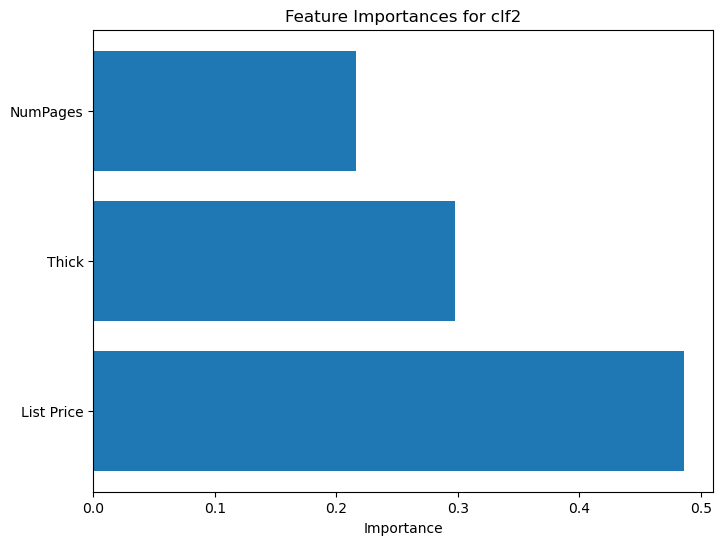

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances and feature names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a pandas DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances for clf2')
plt.show()


List Price seems to be the most important predictor variable

***ChatGPT Chat Summary***

Here’s a summary of our conversation:

- **Decision Tree Model Training**: We trained two decision tree models (`clf` and `clf2`) to classify books as either "Hard" or "Paper" based on certain features, using features like `NumPages`, `Thick`, and `List Price` in different configurations.
- **Confusion Matrix and Performance Metrics**: We calculated the confusion matrix, accuracy, sensitivity, and specificity for both models using test data and discussed how to evaluate the model's performance.
- **Feature Importance Visualization**: I showed how to visualize feature importances for `clf2`, using `clf2.feature_importances_` and `clf2.feature_names_in_`, and demonstrated how to plot them using Matplotlib.

Let me know if you need further clarification!

link: https://chatgpt.com/share/6737f0c0-3604-800d-940d-9391a393c98f

***Question 9***
---

In linear regression the predictor coefficients describe the general magnitude of effect which the predictor variable has on the outcome variable. On the other hand, feature importances in classification trees describe how useful each classification variable is in determining the final outcome variable.  